# Redes Lógicas Tensoriais com LTNTorch: Uma Introdução com Exemplos Práticos


## O que é uma Rede Lógica Tensorial (LTN)?
O LTN é um framework Neuro-Simbólico (NeSi) que combina efetivamente o poder do deep learning (Tensores) com o rigor do raciocínio
lógico (Lógica).

### A Ideia Central
Definir uma base de conhecimento lógico (KB)
e usá-la como a função objetivo (ou função de perda) para um modelo neural.

### Como isso é Possível?
Isso é possível usando lógica fuzzy, que relaxa os valores de verdade clássicos (Verdadeiro/Falso ou 1/0)
para um intervalo contínuo $[0, 1]$.

Isso torna as operações lógicas diferenciáveis, permitindo o aprendizado através da otimização padrão de
gradient descent (descida de gradiente).


### O Conceito Fundamental: Lógica Real (Real Logic)
LTN é baseado em uma linguagem formal chamada "Lógica Real" (Real Logic).

- Domínios: São interpretados como Tensores no corpo dos números reais $\mathbb{R}^n$ (incluindo escalares, vetores, matrizes, etc.).
- "Aterramento" (Grounding, $\mathcal{G}$): Este é o termo do LTN para a "interpretação" da lógica. Ele mapeia símbolos lógicos para tensores e funções diferenciáveis:
    - Constantes (ex: 'a', 'b') $\rightarrow$ Tensores (ex: vetores de embedding em $\mathbb{R}^d$).
    - Predicados (ex: 'P(x)') $\rightarrow$ Funções Diferenciáveis (ex: uma rede neural) que mapeiam tensores para um valor de verdade em $[0, 1]$.Ex: $P: \mathbb{R}^d \rightarrow [0, 1]$
    - Funções (ex: 'f(x)') $\rightarrow$ Funções Diferenciáveis (ex: uma rede neural) que mapeiam tensores para outros tensores.Ex: $f: \mathbb{R}^d \rightarrow \mathbb{R}^m$

## Tornando a Lógica Diferenciável: Operadores Fuzzy

Para que o backpropagation funcione, precisamos substituir os operadores lógicos clássicos ($\land, \lor, \lnot, \forall, \exists, \implies$) por versões "fuzzy" que sejam diferenciáveis.

Conectivos (t-normas, t-conormas)
* Conjunção ($\land$): t-norma do produto:$\mathcal{A}_{\land}(u, v) = u \cdot v$
* Disjunção ($\lor$): t-conorma do produto:$\mathcal{A}_{\lor}(u, v) = u + v - u \cdot v$
* Negação ($\lnot$): Negação padrão:$\mathcal{A}_{\lnot}(u) = 1 - u$
* Implicação ($\implies$): Implicação de Reichenbach:$\mathcal{A}_{\implies}(u, v) = 1 - u + u \cdot v$

Quantificadores (Agregadores)
- Universal ($\forall x$): Média generalizada (p-mean error):$\mathcal{A}_{\forall}(u_1, ..., u_n) = 1 - \left(\frac{1}{n}\sum_{i=1}^{n}(1-u_{i})^{p}\right)^{\frac{1}{p}}$
- Existencial ($\exists x$): Média generalizada (p-mean):$\mathcal{A}_{\exists}(u_1, ..., u_n) = \left(\frac{1}{n}\sum_{i=1}^{n}u_{i}^{p}\right)^{\frac{1}{p}}$

Ponto Chave: Todas estas operações são diferenciáveis, permitindo-nos propagar gradientes através de fórmulas lógicas complexas.
    

O Framework LTNtorch

LTNtorch é a implementação prática desses conceitos em PyTorch. Ele fornece os blocos de construção fundamentais:
- ltn.Constant: Um tensor que representa uma constante lógica (ex: um embedding fixo).
- ltn.Variable: Um tensor para variáveis (ex: 'x', 'y') que serão usadas em quantificadores.
- ltn.Predicate: Um torch.nn.Module que retorna um valor em $[0, 1]$. É aqui que a rede neural "aprende".
- ltn.Function: Um torch.nn.Module que retorna um tensor.
- ltn.Connective: And, Or, Not, Implies.ltn.
- Quantifier: Forall, Exists.ltn.
- Aggregator: SatAgg (Agrega o nível de satisfação de todas as fórmulas na Base de Conhecimento).

O Processo de Aprendizado em 5 PassosO fluxo de trabalho para treinar um modelo LTN é o seguinte:

1. Definir a Base de Conhecimento (KB): Escreva seus axiomas (conhecimento prévio) usando os componentes do LTNtorch.
2. Aterramento (Grounding): Alimente os dados de treinamento (tensores PyTorch) nas ltn.Variable das fórmulas.
3. Avaliação: Calcule o nível de satisfação de toda a KB (um único valor em $[0, 1]$) usando SatAgg.
4. Cálculo da Perda (Loss): A perda é simplesmente $Loss = 1.0 - SatAgg(\text{KB})$. Nosso objetivo é minimizar essa perda, o que equivale a maximizar a satisfação da lógica.
5. Otimização: Use um otimizador padrão do PyTorch (como Adam) para fazer o backpropagate da perda e atualizar os parâmetros dos ltn.Predicate (as redes neurais).

## Tutorial Prático: Classificação Binária
Vamos aplicar esses conceitos a um problema simples de classificação binária (baseado em 1-binary_classification.ipynb

Problema: Classificar pontos 2D em duas classes, A (positiva) e Não-A (negativa).

Configuração do LTN:
1. Predicado: Precisamos de um predicado A(x) que aprenda "O ponto x pertence à classe A?". Vamos usar uma pequena rede neural (MLP) para isso.
2. Variáveis: Precisamos de variáveis para conter nossos dados: x_A (exemplos positivos) e x_B (exemplos negativos).
3. Base de Conhecimento (Axiomas):
   - Axioma 1: Todos os exemplos positivos devem ser A.
     * $\forall x_A (A(x_A))$
   - Axioma 2: Todos os exemplos negativos NÃO devem ser A.
     * $\forall x_B (\lnot A(x_B))$

In [1]:
!pip install LTNtorch

### Código: 1.
Imports e Definição do ModeloPrimeiro, importamos torch e ltntorch, e definimos nossa rede neural (MLP) que servirá como o predicado. Esta rede neural é o componente que irá aprender.import torc

In [2]:
# Código 1
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import ltn as ltntorch
import random
#import ltn as ltntorch
import numpy as np
import matplotlib.pyplot as plt

# Configura o LTNtorch para usar o dispositivo (GPU se disponível)
ltntorch.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {ltntorch.device}")

class MLP(nn.Module):
    """Define um Perceptron Multicamadas (MLP) simples."""
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid() # Sigmoid força a saída para [0, 1]

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

Usando dispositivo: cuda:0


### Código: 2. Geração de Dados
Criamos alguns dados 2D de exemplo. A Classe A (positiva) está no centro, e a Classe B (negativa) está ao redor.


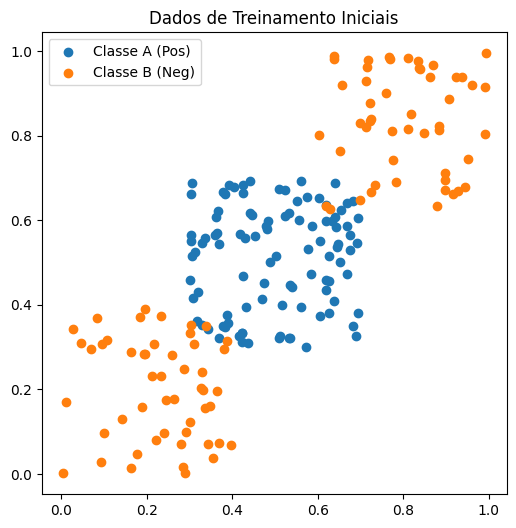

In [3]:
# Gerando dados de exemplo
# Classe A (Positiva) - Centro (0.5, 0.5)
data_pos = (torch.rand((100, 2)) * 0.4 + 0.3).to(ltntorch.device)
# Classe B (Negativa) - Pontos fora do centro
data_neg_1 = (torch.rand((50, 2)) * 0.4).to(ltntorch.device)
data_neg_2 = (torch.rand((50, 2)) * 0.4 + 0.6).to(ltntorch.device)
data_neg = torch.cat((data_neg_1, data_neg_2))

# Visualização dos dados (movendo para CPU para matplotlib)
plt.figure(figsize=(6, 6))
plt.scatter(data_pos.cpu()[:, 0], data_pos.cpu()[:, 1], label='Classe A (Pos)')
plt.scatter(data_neg.cpu()[:, 0], data_neg.cpu()[:, 1], label='Classe B (Neg)')
plt.title('Dados de Treinamento Iniciais')
plt.legend()
plt.show()


### Código: 3. Definição da Lógica LTN

Agora, instanciamos nossos componentes LTN.
* ltn.Predicate "embrulha" nosso modelo MLP, identificando-o como um predicado lógico.
* SatAgg é o agregador que usaremos para calcular a satisfação total da nossa base de conhecimento.


In [4]:
# Define o Predicado A
# Ele usa nosso MLP para mapear uma entrada de 2D para 1D (valor de verdade)
A_model = MLP(2, 16, 1).to(ltntorch.device)
A = ltntorch.Predicate(A_model)

In [5]:
# Define os Agregadores e Otimizador
# Define logical operators
Not = ltntorch.Connective(ltntorch.fuzzy_ops.NotStandard())
And = ltntorch.Connective(ltntorch.fuzzy_ops.AndProd())
Or = ltntorch.Connective(ltntorch.fuzzy_ops.OrProbSum())
Implies = ltntorch.Connective(ltntorch.fuzzy_ops.ImpliesReichenbach())
Forall = ltntorch.Quantifier(ltntorch.fuzzy_ops.AggregPMeanError(p=2), quantifier="f")
Exists = ltntorch.Quantifier(ltntorch.fuzzy_ops.AggregPMean(p=2), quantifier="e")
# SatAgg (Agregador de Satisfação) calculará a satisfação total da KB
sat_agg = ltntorch.fuzzy_ops.SatAgg()
# Otimizador padrão do PyTorch
optimizer = torch.optim.Adam(A.parameters(), lr=0.001)

## Código: 4. O Loop de Treinamento
Este é o núcleo do LTN.
1. Definimos ltn.Variable para nossos dados.
2. Formulamos nossos dois axiomas usando ltn.Forall, ltn.Not e o predicado A.
3. Calculamos a satisfação total (sat) da KB agregando os axiomas.
4. A perda (loss) é 1.0 - sat. Queremos maximizar a satisfação, então minimizamos 1.0 - sat.
5. Usamos loss.backward() e optimizer.step() como em qualquer treinamento PyTorch.


In [6]:
# Loop de Treinamento
for epoch in range(1000):
    optimizer.zero_grad()

    # 1. Defina as variáveis LTN com os dados de treinamento
    x_A = ltntorch.Variable("x_A", data_pos)
    x_B = ltntorch.Variable("x_B", data_neg)

    # 2. Formule os axiomas
    # Axioma 1: Para todo x_A, A(x_A) deve ser verdadeiro
    axiom_A = Forall(x_A, A(x_A))

    # Axioma 2: Para todo x_B, Não(A(x_B)) deve ser verdadeiro
    axiom_B = Forall(x_B, Not(A(x_B)))

    # 3. Calcule a satisfação total da Base de Conhecimento
    sat = sat_agg(axiom_A, axiom_B)

    # 4. Calcule a perda (loss)
    loss = 1. - sat

    # 5. Backpropagation e Otimização
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Nível de Satisfação (Sat): {sat.item():.4f}, Perda (Loss): {loss.item():.4f}")

print("Treinamento concluído.")

Epoch 0: Nível de Satisfação (Sat): 0.4990, Perda (Loss): 0.5010
Epoch 100: Nível de Satisfação (Sat): 0.5059, Perda (Loss): 0.4941
Epoch 200: Nível de Satisfação (Sat): 0.5120, Perda (Loss): 0.4880
Epoch 300: Nível de Satisfação (Sat): 0.5222, Perda (Loss): 0.4778
Epoch 400: Nível de Satisfação (Sat): 0.5401, Perda (Loss): 0.4599
Epoch 500: Nível de Satisfação (Sat): 0.5726, Perda (Loss): 0.4274
Epoch 600: Nível de Satisfação (Sat): 0.6130, Perda (Loss): 0.3870
Epoch 700: Nível de Satisfação (Sat): 0.6522, Perda (Loss): 0.3478
Epoch 800: Nível de Satisfação (Sat): 0.6863, Perda (Loss): 0.3137
Epoch 900: Nível de Satisfação (Sat): 0.7141, Perda (Loss): 0.2859
Treinamento concluído.


## Código: 5. Visualização dos Resultados

Para ver o que o predicado A aprendeu, criamos uma grade (grid) de pontos e consultamos o predicado em cada ponto. Isso nos dá um "mapa de calor" do valor de verdade de A(x), que é o limite de decisão aprendido.# Cria uma grade de pontos para testar o modelo

In [7]:
grid_size = 20
x_grid = np.linspace(0, 1, grid_size)
y_grid = np.linspace(0, 1, grid_size)
xx, yy = np.meshgrid(x_grid, y_grid)
grid_points = np.stack([xx.ravel(), yy.ravel()], axis=1)
grid_torch = torch.tensor(grid_points, dtype=torch.float32).to(ltntorch.device)

In [8]:
def create_predicate(model):
    class PredicateWrapper(nn.Module):
        def forward(self, x, y):
            # Handle LTNObjects
            x_val = x.value if hasattr(x, 'value') else x
            y_val = y.value if hasattr(y, 'value') else y

            # Your logic here
            output = model(x_val, y_val)

            # Ensure output is in [0, 1] and correct shape
            return torch.sigmoid(output.squeeze())

    return ltntorch.Predicate(PredicateWrapper())

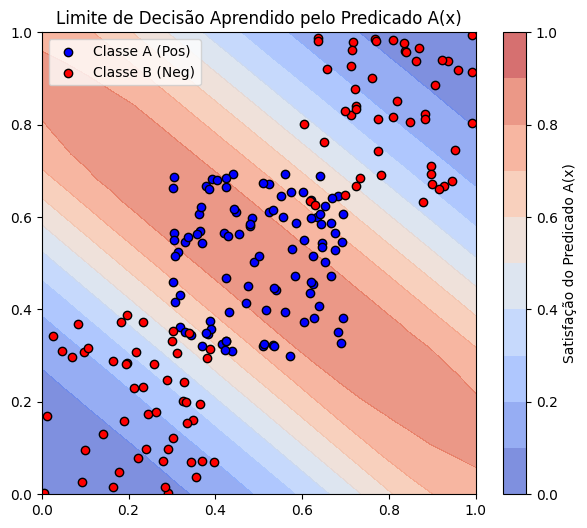

In [9]:

grid_ltn = ltntorch.Variable("x", grid_torch.to(ltntorch.device))
# Obtém a predição (valor de verdade) para cada ponto na grade
with torch.no_grad():
    A_grid = A(grid_ltn)
    truth_values = A_grid.value
    truth_values = truth_values.cpu().numpy()

# Remodela para o formato da grade
zz = truth_values.reshape(xx.shape)

# Plota o limite de decisão (heatmap de satisfação)
plt.figure(figsize=(7, 6))
plt.contourf(xx, yy, zz, levels=np.linspace(0, 1, 11), cmap="coolwarm", alpha=0.7)
plt.colorbar(label='Satisfação do Predicado A(x)')
# Plota os dados de treinamento originais por cima
plt.scatter(data_pos.cpu()[:, 0], data_pos.cpu()[:, 1], label='Classe A (Pos)', c='blue', edgecolors='k')
plt.scatter(data_neg.cpu()[:, 0], data_neg.cpu()[:, 1], label='Classe B (Neg)', c='red', edgecolors='k')
plt.title('Limite de Decisão Aprendido pelo Predicado A(x)')
plt.legend()
plt.show()



## Código: 6. Classificação Binária Cão vs. Gato (Modelo do Artigo)

Nesta seção, vamos **repetir a mesma estrutura** usada no exemplo 2D (dados sintéticos),
mas agora usando uma base real de imagens de **cães** e **gatos**.

A ideia é:

1. Carregar um dataset de imagens com duas classes (Dog e Cat);
2. Definir um predicado lógico `Dog(x)` implementado por uma **CNN em PyTorch**;
3. Definir variáveis lógicas `dog` (imagens de cães) e `cat` (imagens de gatos);
4. Formular os axiomas, no espírito do artigo do LTNtorch:

   - \(\forall dog\; Dog(dog)\)
   - \(\forall cat\; \lnot Dog(cat)\)

5. Treinar o modelo maximizando a satisfação desses axiomas (minimizando `1 - SatAgg`);
6. Visualizar alguns exemplos com os valores de verdade aprendidos por `Dog(x)`.


In [10]:

# Preparação da base Cão vs. Gato usando kagglehub (ideal para Google Colab)
# Esta célula:
# 1) Baixa o dataset 'bhavikjikadara/dog-and-cat-classification-dataset';
# 2) Localiza a pasta PetImages/{Dog,Cat};
# 3) Copia as imagens para data/cats_dogs/{dogs,cats}, que é o formato usado pelo restante do notebook.

!pip install kagglehub -q

import kagglehub
from pathlib import Path
import shutil

# Diretórios de destino no formato esperado
DATA_ROOT = Path("data/cats_dogs")
DOG_DIR = DATA_ROOT / "dogs"
CAT_DIR = DATA_ROOT / "cats"

DOG_DIR.mkdir(parents=True, exist_ok=True)
CAT_DIR.mkdir(parents=True, exist_ok=True)

# Baixa a versão mais recente do dataset no cache local
path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")
print("Path retornado pelo kagglehub:", path)

# O dataset possui uma pasta chamada PetImages com duas pastas internas: Cat e Dog
petimages = Path(path) / "PetImages"
dog_src = petimages / "Dog"
cat_src = petimages / "Cat"

if not petimages.exists():
    raise FileNotFoundError(f"Não foi encontrada a pasta 'PetImages' em {path}. Verifique a estrutura do dataset.")

print("Copiando imagens de Dog para data/cats_dogs/dogs...")
for p in dog_src.glob("*.*"):
    if p.name.lower().endswith(".db"):
        continue
    dest = DOG_DIR / p.name
    if not dest.exists():
        shutil.copy2(p, dest)

print("Copiando imagens de Cat para data/cats_dogs/cats...")
for p in cat_src.glob("*.*"):
    if p.name.lower().endswith(".db"):
        continue
    dest = CAT_DIR / p.name
    if not dest.exists():
        shutil.copy2(p, dest)

print("Preparação concluída.")
print(f"Total de imagens em {DOG_DIR}: {len(list(DOG_DIR.glob('*.*')))}")
print(f"Total de imagens em {CAT_DIR}: {len(list(CAT_DIR.glob('*.*')))}")


Using Colab cache for faster access to the 'dog-and-cat-classification-dataset' dataset.
Path retornado pelo kagglehub: /kaggle/input/dog-and-cat-classification-dataset
Copiando imagens de Dog para data/cats_dogs/dogs...
Copiando imagens de Cat para data/cats_dogs/cats...
Preparação concluída.
Total de imagens em data/cats_dogs/dogs: 12499
Total de imagens em data/cats_dogs/cats: 12499


In [11]:

# Dataset de imagens: definimos uma classe simples baseada em diretórios,
# e DataLoaders para cães e gatos, de forma análoga ao uso de data_pos/data_neg no exemplo 2D.

from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as T

IMAGE_SIZE = 128
BATCH_SIZE = 32

transform = T.Compose([
    T.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    T.ToTensor()
])

class SimpleImageFolder(Dataset):
    """Carrega todas as imagens de um diretório (sem rótulo explícito)."""
    def __init__(self, root_dir: Path, transform=None):
        self.root_dir = Path(root_dir)
        exts = ["*.jpg", "*.jpeg", "*.png", "*.bmp"]
        self.paths = []
        for ext in exts:
            self.paths.extend(sorted(self.root_dir.glob(ext)))
        self.transform = transform

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        img_path = self.paths[idx]
        img = Image.open(img_path).convert("RGB")
        if self.transform is not None:
            img = self.transform(img)
        return img

dog_dataset = SimpleImageFolder(DOG_DIR, transform=transform)
cat_dataset = SimpleImageFolder(CAT_DIR, transform=transform)

dog_loader = DataLoader(dog_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
cat_loader = DataLoader(cat_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

print(f"Total de imagens de cães (treino): {len(dog_dataset)}")
print(f"Total de imagens de gatos (treino): {len(cat_dataset)}")


Total de imagens de cães (treino): 12499
Total de imagens de gatos (treino): 12499


In [12]:

# Definição da CNN e do predicado lógico Dog(x), replicando a mesma ideia do MLP + A(x),
# mas agora para imagens de cães e gatos conforme o artigo.

import torch.nn as nn
import torch

class CNN_Dog(nn.Module):
    """CNN simples para classificar imagens em 'dog' vs 'not dog'.
    A saída é um escalar em [0, 1], interpretado como valor de verdade do predicado Dog(x).
    """
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.AdaptiveAvgPool2d((4, 4))
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 4 * 4, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Instancia o modelo e o predicado Dog(x)
cnn_dog_model = CNN_Dog().to(ltntorch.device)
Dog = ltntorch.Predicate(cnn_dog_model)

# Operadores lógicos específicos para este exemplo de imagens
Not_img = ltntorch.Connective(ltntorch.fuzzy_ops.NotStandard())
Forall_img = ltntorch.Quantifier(
    ltntorch.fuzzy_ops.AggregPMeanError(p=2),
    quantifier="f"
)
SatAgg_img = ltntorch.fuzzy_ops.SatAgg()

optimizer_img = torch.optim.Adam(Dog.parameters(), lr=1e-4)

print("Modelo CNN_Dog e predicado Dog(x) prontos.")


Modelo CNN_Dog e predicado Dog(x) prontos.


In [13]:

# Loop de treinamento Dog vs. Cat, análogo ao loop 2D:
# - Em vez de x_A e x_B, usamos dog e cat como variáveis lógicas;
# - No lugar de A(x), usamos Dog(x) em imagens;
# - Axiomas:
#     ∀dog Dog(dog)
#     ∀cat ¬Dog(cat)

n_epochs = 10  # ajuste conforme recursos de hardware

for epoch in range(n_epochs):
    epoch_loss = 0.0

    for dog_imgs, cat_imgs in zip(dog_loader, cat_loader):
        optimizer_img.zero_grad()

        dog_imgs = dog_imgs.to(ltntorch.device)
        cat_imgs = cat_imgs.to(ltntorch.device)

        dog = ltntorch.Variable("dog", dog_imgs)
        cat = ltntorch.Variable("cat", cat_imgs)

        phi1 = Forall_img(dog, Dog(dog))           # ∀dog Dog(dog)
        phi2 = Forall_img(cat, Not_img(Dog(cat)))  # ∀cat ¬Dog(cat)

        sat_agg = SatAgg_img(phi1, phi2)
        loss = 1.0 - sat_agg

        loss.backward()
        optimizer_img.step()

        epoch_loss += loss.item()

    epoch_loss /= max(1, len(dog_loader))
    print(f"[Dog vs Cat] Epoch {epoch+1}/{n_epochs} - Sat: {sat_agg.item():.4f} - Loss: {epoch_loss:.4f}")

print("Treinamento Dog vs Cat concluído.")


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


[Dog vs Cat] Epoch 1/10 - Sat: 0.5190 - Loss: 0.4870
[Dog vs Cat] Epoch 2/10 - Sat: 0.5496 - Loss: 0.4628
[Dog vs Cat] Epoch 3/10 - Sat: 0.5247 - Loss: 0.4528
[Dog vs Cat] Epoch 4/10 - Sat: 0.5682 - Loss: 0.4458
[Dog vs Cat] Epoch 5/10 - Sat: 0.5677 - Loss: 0.4399
[Dog vs Cat] Epoch 6/10 - Sat: 0.5686 - Loss: 0.4343
[Dog vs Cat] Epoch 7/10 - Sat: 0.5631 - Loss: 0.4287
[Dog vs Cat] Epoch 8/10 - Sat: 0.5587 - Loss: 0.4234
[Dog vs Cat] Epoch 9/10 - Sat: 0.5983 - Loss: 0.4185
[Dog vs Cat] Epoch 10/10 - Sat: 0.5797 - Loss: 0.4140
Treinamento Dog vs Cat concluído.


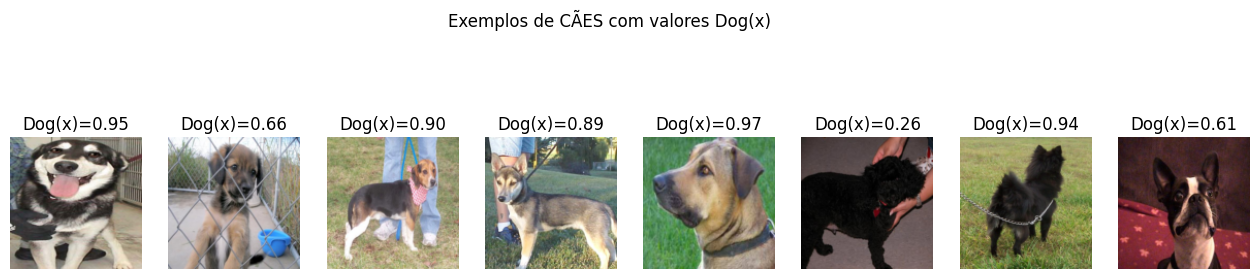

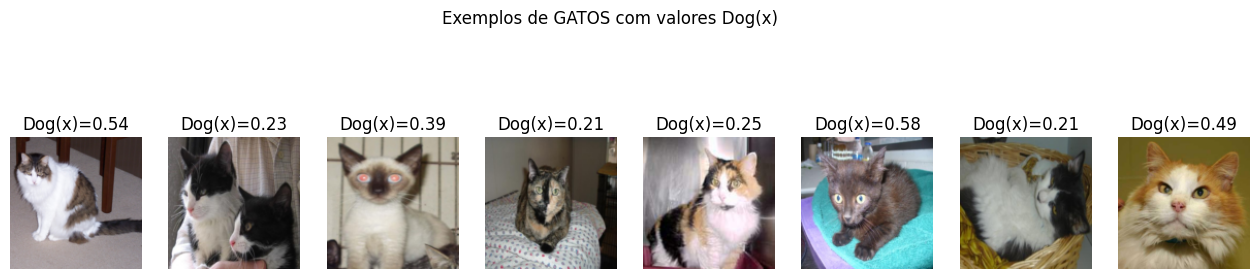

In [15]:
import matplotlib.pyplot as plt

def show_examples(loader, title):
    imgs = next(iter(loader))
    imgs = imgs.to(ltntorch.device)

    # Envolve o tensor em uma Variable do LTN
    x = ltntorch.Variable("x", imgs)

    with torch.no_grad():
        preds_obj = Dog(x)             # isso é um LTNObject
        preds = preds_obj.value        # tensor com os valores de verdade
        preds = preds.cpu().numpy().flatten()

    imgs = imgs.cpu()
    n = min(8, imgs.size(0))
    plt.figure(figsize=(16, 4))
    plt.suptitle(title)
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(imgs[i].permute(1, 2, 0))
        plt.axis("off")
        plt.title(f"Dog(x)={preds[i]:.2f}")
    plt.show()

show_examples(dog_loader, "Exemplos de CÃES com valores Dog(x)")
show_examples(cat_loader, "Exemplos de GATOS com valores Dog(x)")